In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train,_),(x_test,_) = fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

print(x_train.shape)
print(x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor*tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor*tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy,clip_value_min=0.,clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy,clip_value_min=0.,clip_value_max=1.)

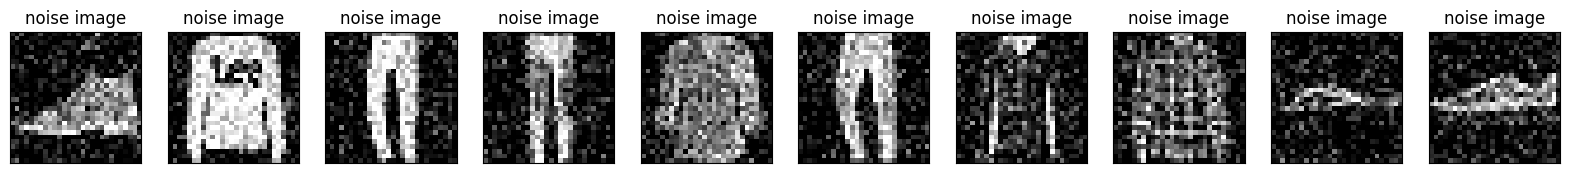

In [6]:
n = 10
plt.figure(figsize=(20,2))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.title("noise image")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
